<a href="https://colab.research.google.com/github/Shanna2000/Predict-Customer-Personality-to-Boost-Marketing-Campaign-by-Using-Machine-Learning/blob/main/Predict_Customer_Personality_To_Boost_Marketing_Campaign_By_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import Data

In [3]:
#https://docs.google.com/spreadsheets/d/1MfYbkEKpcfK4b9YSnZqXEV3GO1YF3IdWJfQ_1X_woCY/edit#gid=1896028247
sheet_id_1 = '1MfYbkEKpcfK4b9YSnZqXEV3GO1YF3IdWJfQ_1X_woCY'

In [4]:
xls =pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id_1}/export?format=xlsx")
df = pd.read_excel(xls, 'marketing_campaign_data',header=0)

# Info about Data

In [5]:
df.shape

(2240, 30)

In [6]:
df.head()

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0           0  5524        1957        S1         Lajang  58138000.0        0   
1           1  2174        1954        S1         Lajang  46344000.0        1   
2           2  4141        1965        S1    Bertunangan  71613000.0        0   
3           3  6182        1984        S1    Bertunangan  26646000.0        1   
4           4  5324        1981        S3        Menikah  58293000.0        1   

   Teenhome          Dt_Customer  Recency  ...  NumWebVisitsMonth  \
0         0  2012-04-09 00:00:00       58  ...                  7   
1         1  2014-08-03 00:00:00       38  ...                  5   
2         0           21-08-2013       26  ...                  4   
3         0  2014-10-02 00:00:00       26  ...                  6   
4         0           19-01-2014       94  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  
2         0              3         11         0  
3         0              3         11         0  
4         0              3         11         0  

[5 rows x 30 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

# New Section

In [8]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df.describe()

Unnamed: 0            ID   Year_Birth        Income      Kidhome  \
count  2240.000000   2240.000000  2240.000000  2.216000e+03  2240.000000   
mean   1119.500000   5592.159821  1968.805804  5.224725e+07     0.444196   
std     646.776623   3246.662198    11.984069  2.517308e+07     0.538398   
min       0.000000      0.000000  1893.000000  1.730000e+06     0.000000   
25%     559.750000   2828.250000  1959.000000  3.530300e+07     0.000000   
50%    1119.500000   5458.500000  1970.000000  5.138150e+07     0.000000   
75%    1679.250000   8427.750000  1977.000000  6.852200e+07     1.000000   
max    2239.000000  11191.000000  1996.000000  6.666660e+08     2.000000   

          Teenhome      Recency       MntCoke      MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2.240000e+03    2240.000000     2.240000e+03   
mean      0.506250    49.109375  3.039357e+05   26302.232143     1.669500e+05   
std       0.544538    28.962453  3.365974e+05   39773.433765     2.257154e+05   
min       0.000000     0.000000  0.000000e+00       0.000000     0.000000e+00   
25%       0.000000    24.000000  2.375000e+04    1000.000000     1.600000e+04   
50%       0.000000    49.000000  1.735000e+05    8000.000000     6.700000e+04   
75%       1.000000    74.000000  5.042500e+05   33000.000000     2.320000e+05   
max       2.000000    99.000000  1.493000e+06  199000.000000     1.725000e+06   

       ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count  ...        2240.000000   2240.000000   2240.000000   2240.000000   
mean   ...           5.316518      0.072768      0.074554      0.072768   
std    ...           2.426645      0.259813      0.262728      0.259813   
min    ...           0.000000      0.000000      0.000000      0.000000   
25%    ...           3.000000      0.000000      0.000000      0.000000   
50%    ...           6.000000      0.000000      0.000000      0.000000   
75%    ...           7.000000      0.000000      0.000000      0.000000   
max    ...          20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 27 columns]

# Feature Engineering

In [10]:
# Change data type date column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Create total days joined
df['Dt_Collected'] = date.today()
df['Dt_Collected'] = df['Dt_Collected'].astype('datetime64[ns]')
df['total_days_joined'] = df['Dt_Collected'] - df['Dt_Customer']
df['total_days_joined'] = df['total_days_joined'].dt.days

<ipython-input-10-accfd379f549>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [11]:
# create age column
df['age'] = 2023 - df['Year_Birth'] 

In [12]:
# Create total accepted campaign
df['total_acc_campaign'] = (df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'])

In [13]:
# Create total_spending column
df['total_spending'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [14]:
# create feature conversion_rate
df['Total_Purchase'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

def conversion_formula (x,y):
  try:
    return x/y
  except:
    return 0

df['conversion_rate'] = df.apply(lambda x : conversion_formula(x['Total_Purchase'], x['NumWebVisitsMonth']), axis = 1)

In [15]:
# Create age_group column
df['age_group'] = np.where(df['age']<=35, '26-35', np.where(df['age']<=50, '36-50', np.where(df['age']<=75, '51-75', '>75')))

In [16]:
# Create total_children column
df['total_children'] = df['Kidhome'] + df['Teenhome']

In [17]:
df.head()

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0           0  5524        1957        S1         Lajang  58138000.0        0   
1           1  2174        1954        S1         Lajang  46344000.0        1   
2           2  4141        1965        S1    Bertunangan  71613000.0        0   
3           3  6182        1984        S1    Bertunangan  26646000.0        1   
4           4  5324        1981        S3        Menikah  58293000.0        1   

   Teenhome Dt_Customer  Recency  ...  Response  Dt_Collected  \
0         0  2012-04-09       58  ...         1    2023-04-14   
1         1  2014-08-03       38  ...         0    2023-04-14   
2         0  2013-08-21       26  ...         0    2023-04-14   
3         0  2014-10-02       26  ...         0    2023-04-14   
4         0  2014-01-19       94  ...         0    2023-04-14   

   total_days_joined  age  total_acc_campaign  total_spending  Total_Purchase  \
0               4022   66                   0         1617000              25   
1               3176   69                   0           27000               6   
2               3523   58                   0          776000              21   
3               3116   39                   0           53000               8   
4               3372   42                   0          422000              19   

   conversion_rate  age_group  total_children  
0         3.571429      51-75               0  
1         1.200000      51-75               2  
2         5.250000      51-75               0  
3         1.333333      36-50               1  
4         3.800000      36-50               1  

[5 rows x 39 columns]

# Exploratory Data Analysis

## Univariate

In [18]:
categorical = []
numerical = []
numerical_remove = ['Unnamed: 0','ID','Year_Birth', 'Z_CostContact', 'Z_Revenue']
for i in df.columns:
  if i in numerical_remove:
    continue
  if df[i].dtype == 'int64' or df[i].dtype == 'float64':
    numerical.append(i)
  elif df[i].dtype == 'object':
    categorical.append(i)

### Categorical

In [19]:
categorical.extend(['Kidhome', 'Teenhome', 'total_children', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'total_acc_campaign', 'Response', 'Complain'])

In [20]:
categorical

['Education',
 'Marital_Status',
 'age_group',
 'Kidhome',
 'Teenhome',
 'total_children',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'total_acc_campaign',
 'Response',
 'Complain']

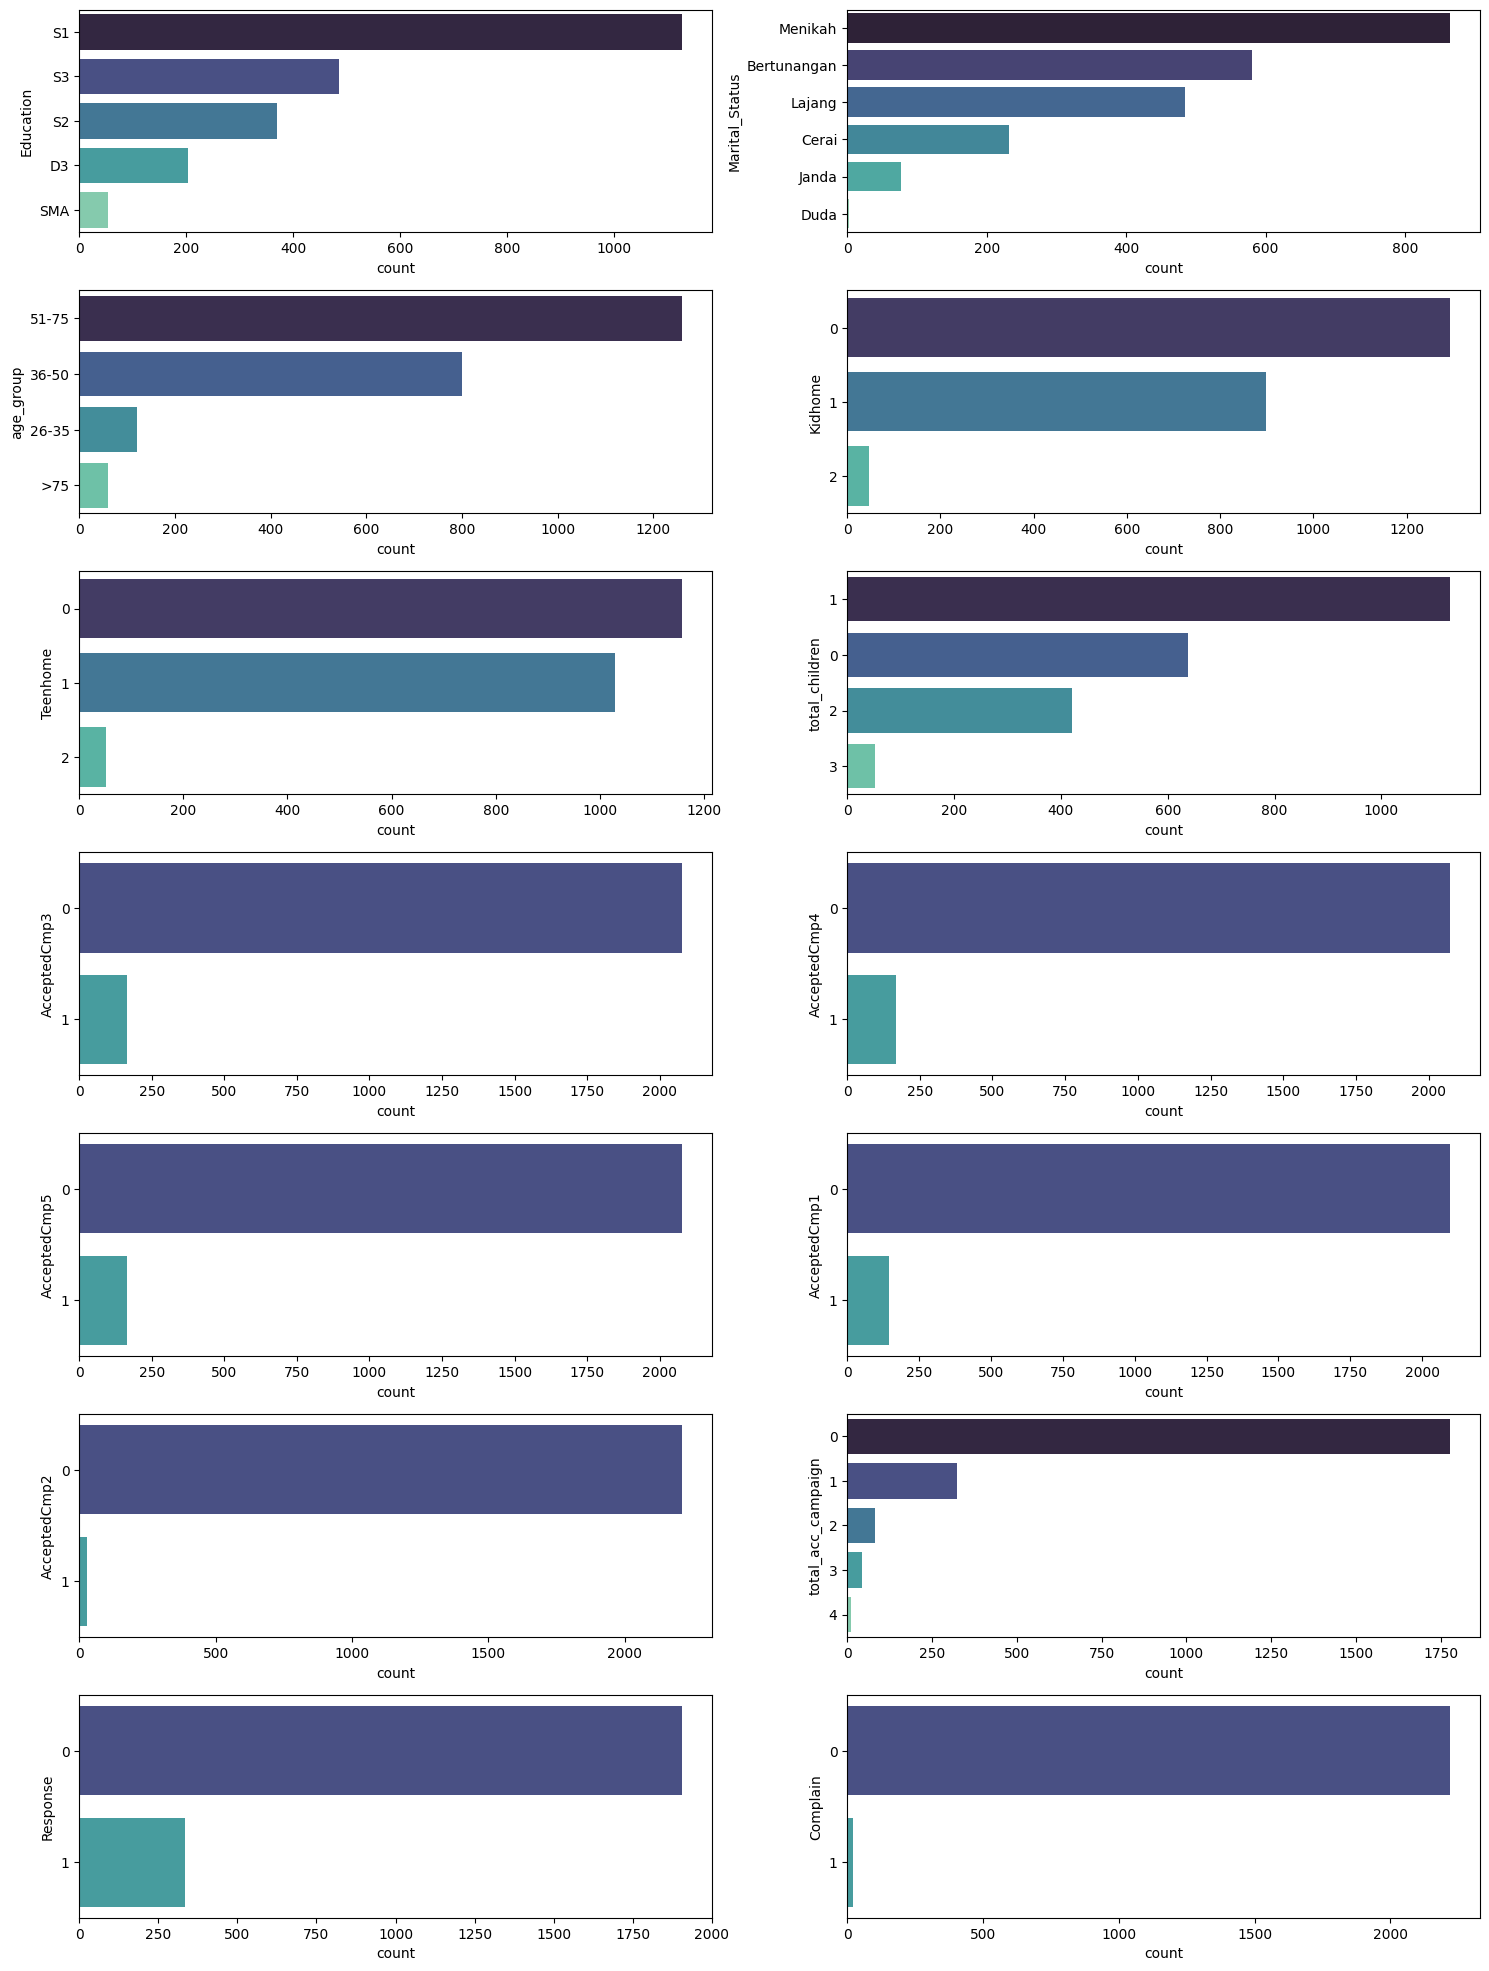

In [21]:
plt.figure(figsize=(15, 25))
for i in range(len(categorical)):
  plt.subplot(9,2, i+1)
  sns.countplot(data = df, y = categorical[i], order=df[categorical[i]].value_counts().index, palette = 'mako')
  plt.tight_layout()

### Numerical

In [22]:
numerical = [num for num in numerical if num not in categorical]

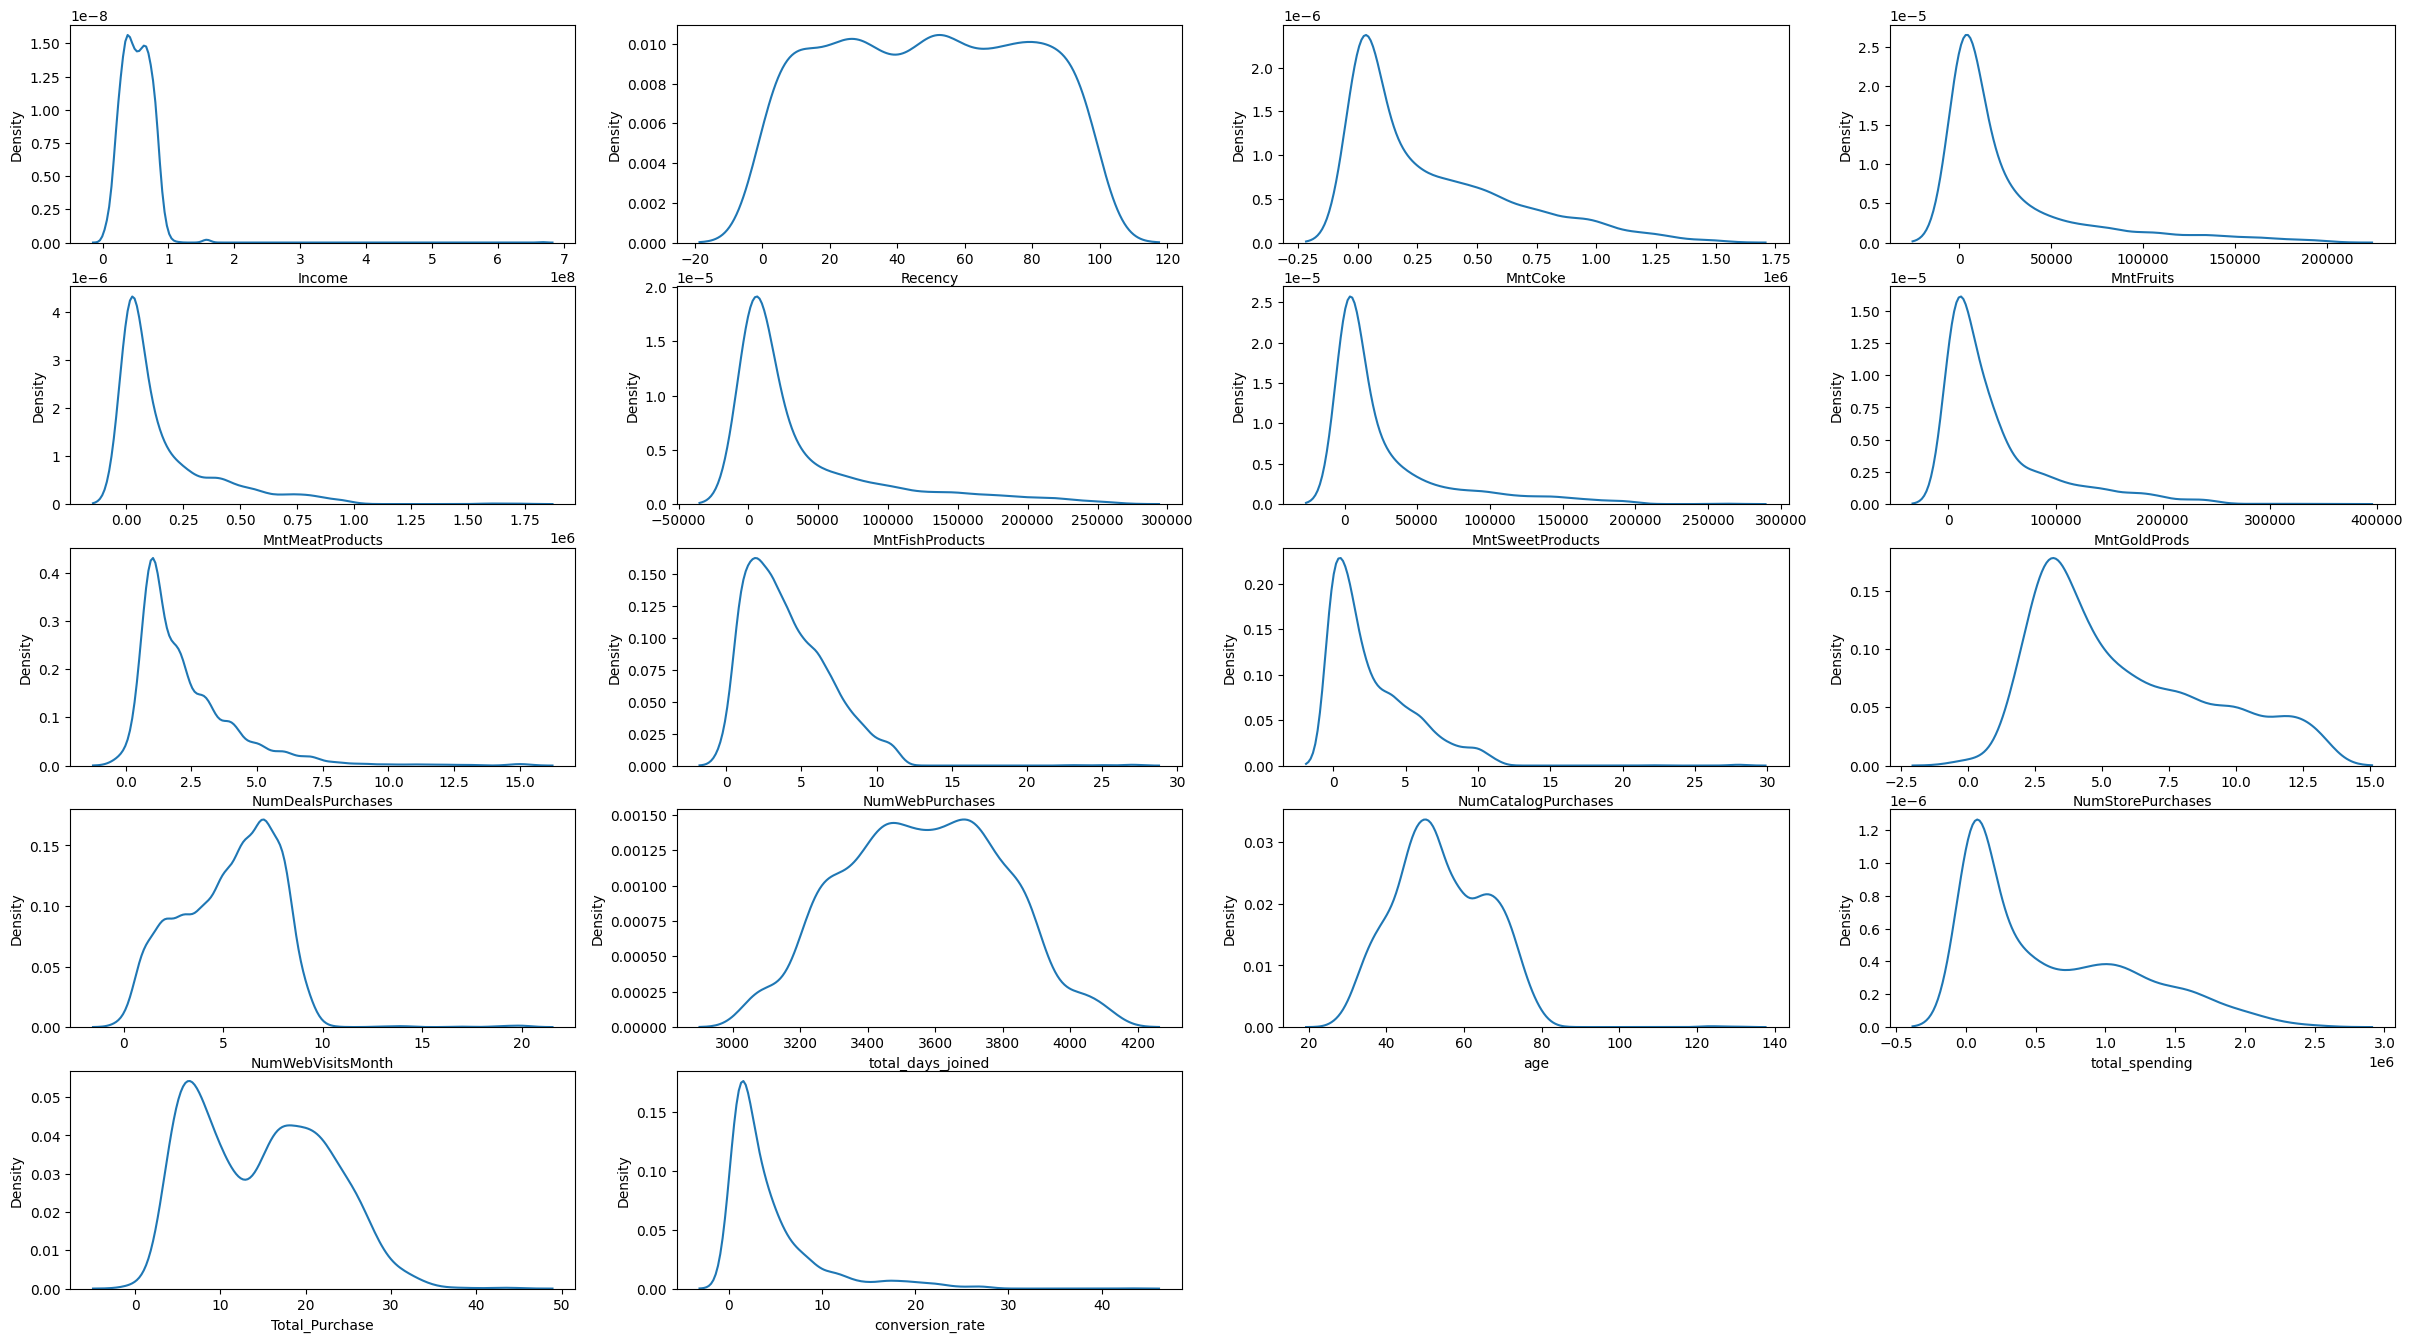

In [23]:
plt.figure(figsize = (30,30))
for i in range(len(numerical)):
  plt.subplot(9, 4, i+1)
  sns.kdeplot(data = df, x = numerical[i])

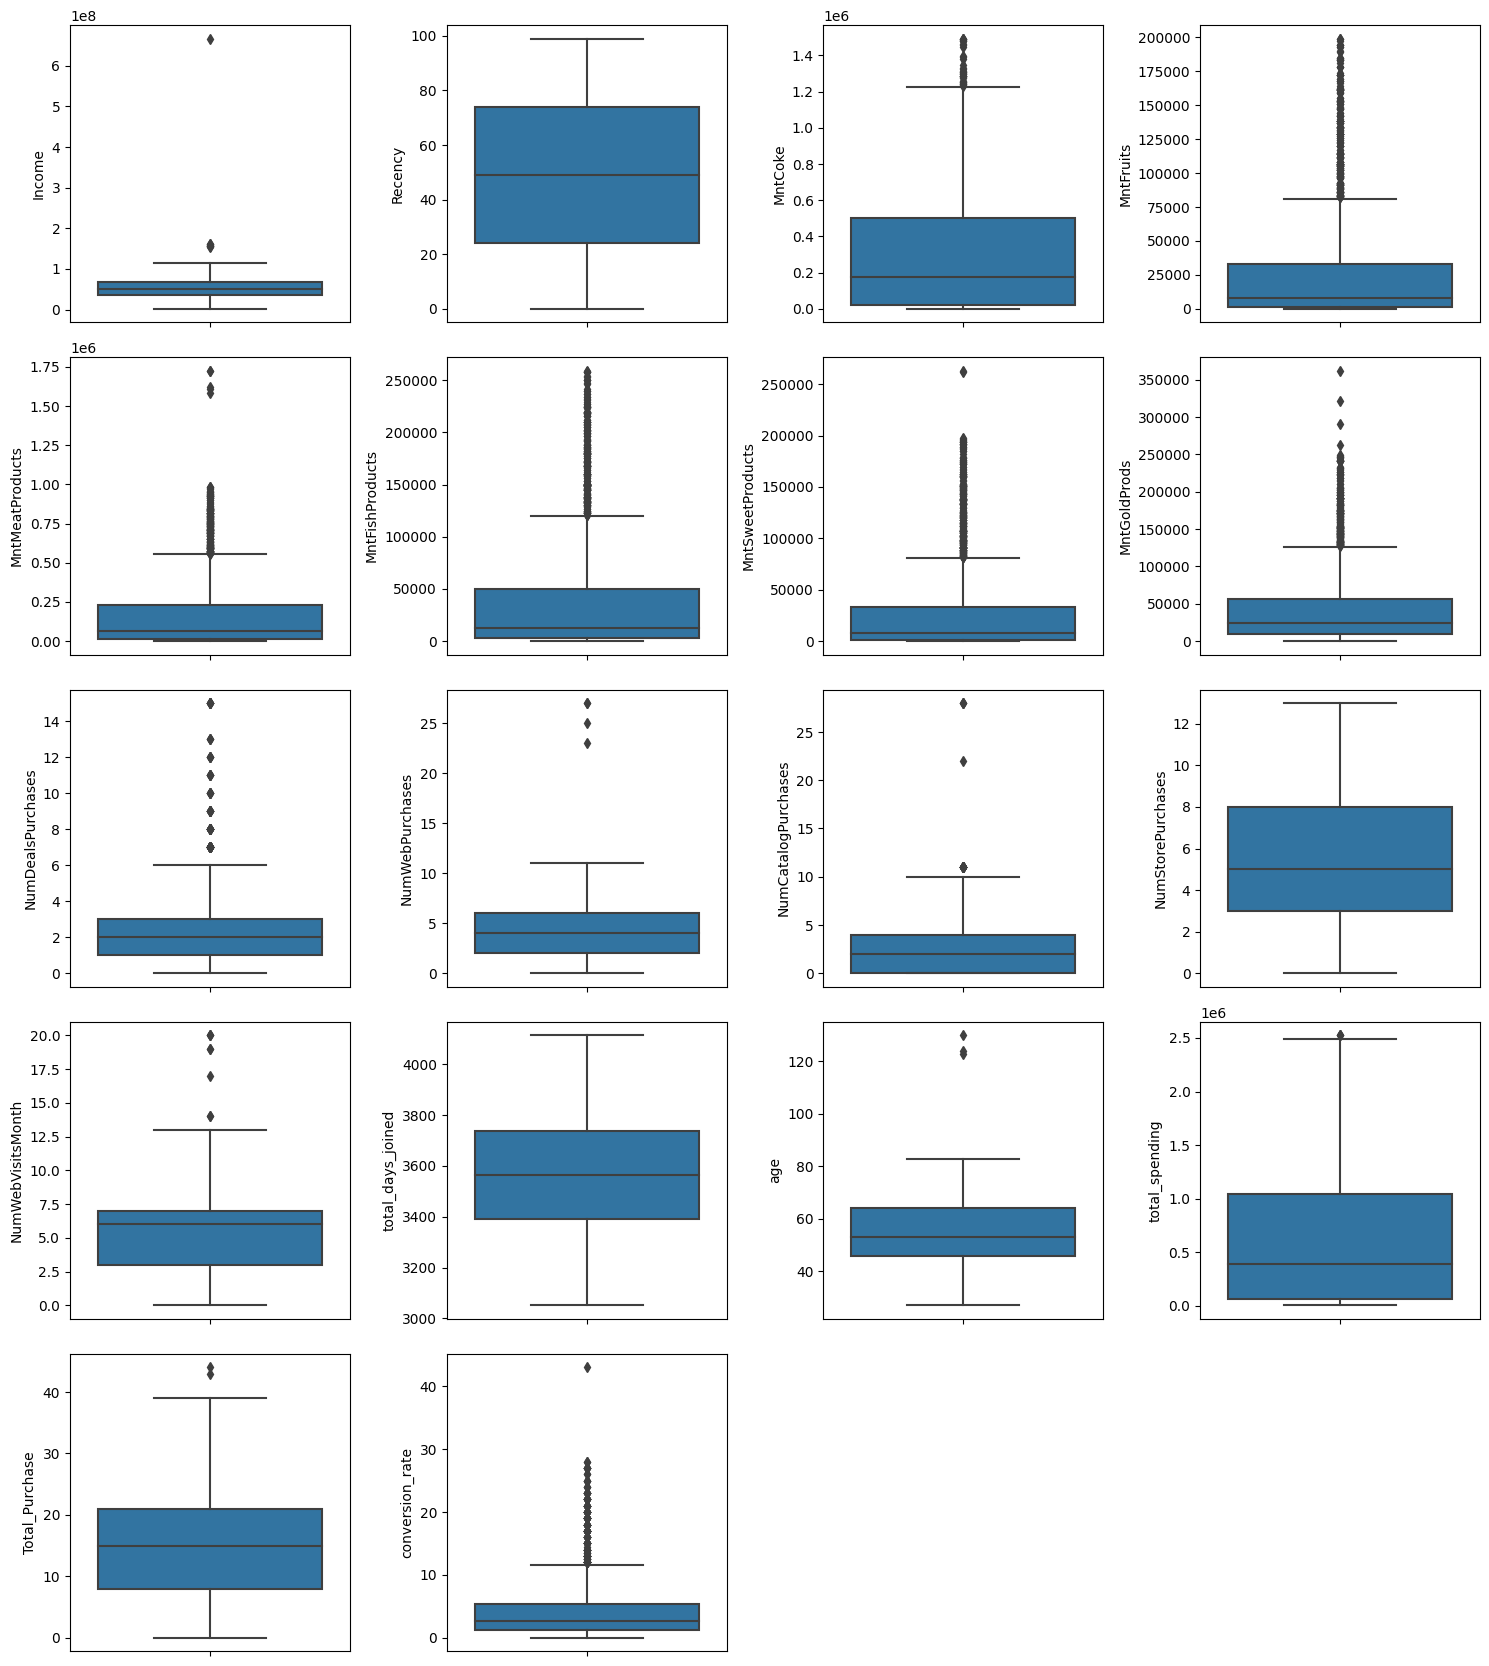

In [24]:
plt.figure(figsize = (15,30))
for i in range(len(numerical)):
  plt.subplot(9, 4, i+1)
  sns.boxplot(data = df, y = numerical[i])
  plt.tight_layout()

## Multivariate

### Categorical

### Numerical

In [25]:
df.drop(columns = ['Unnamed: 0', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue'], inplace = True)

<Axes: >

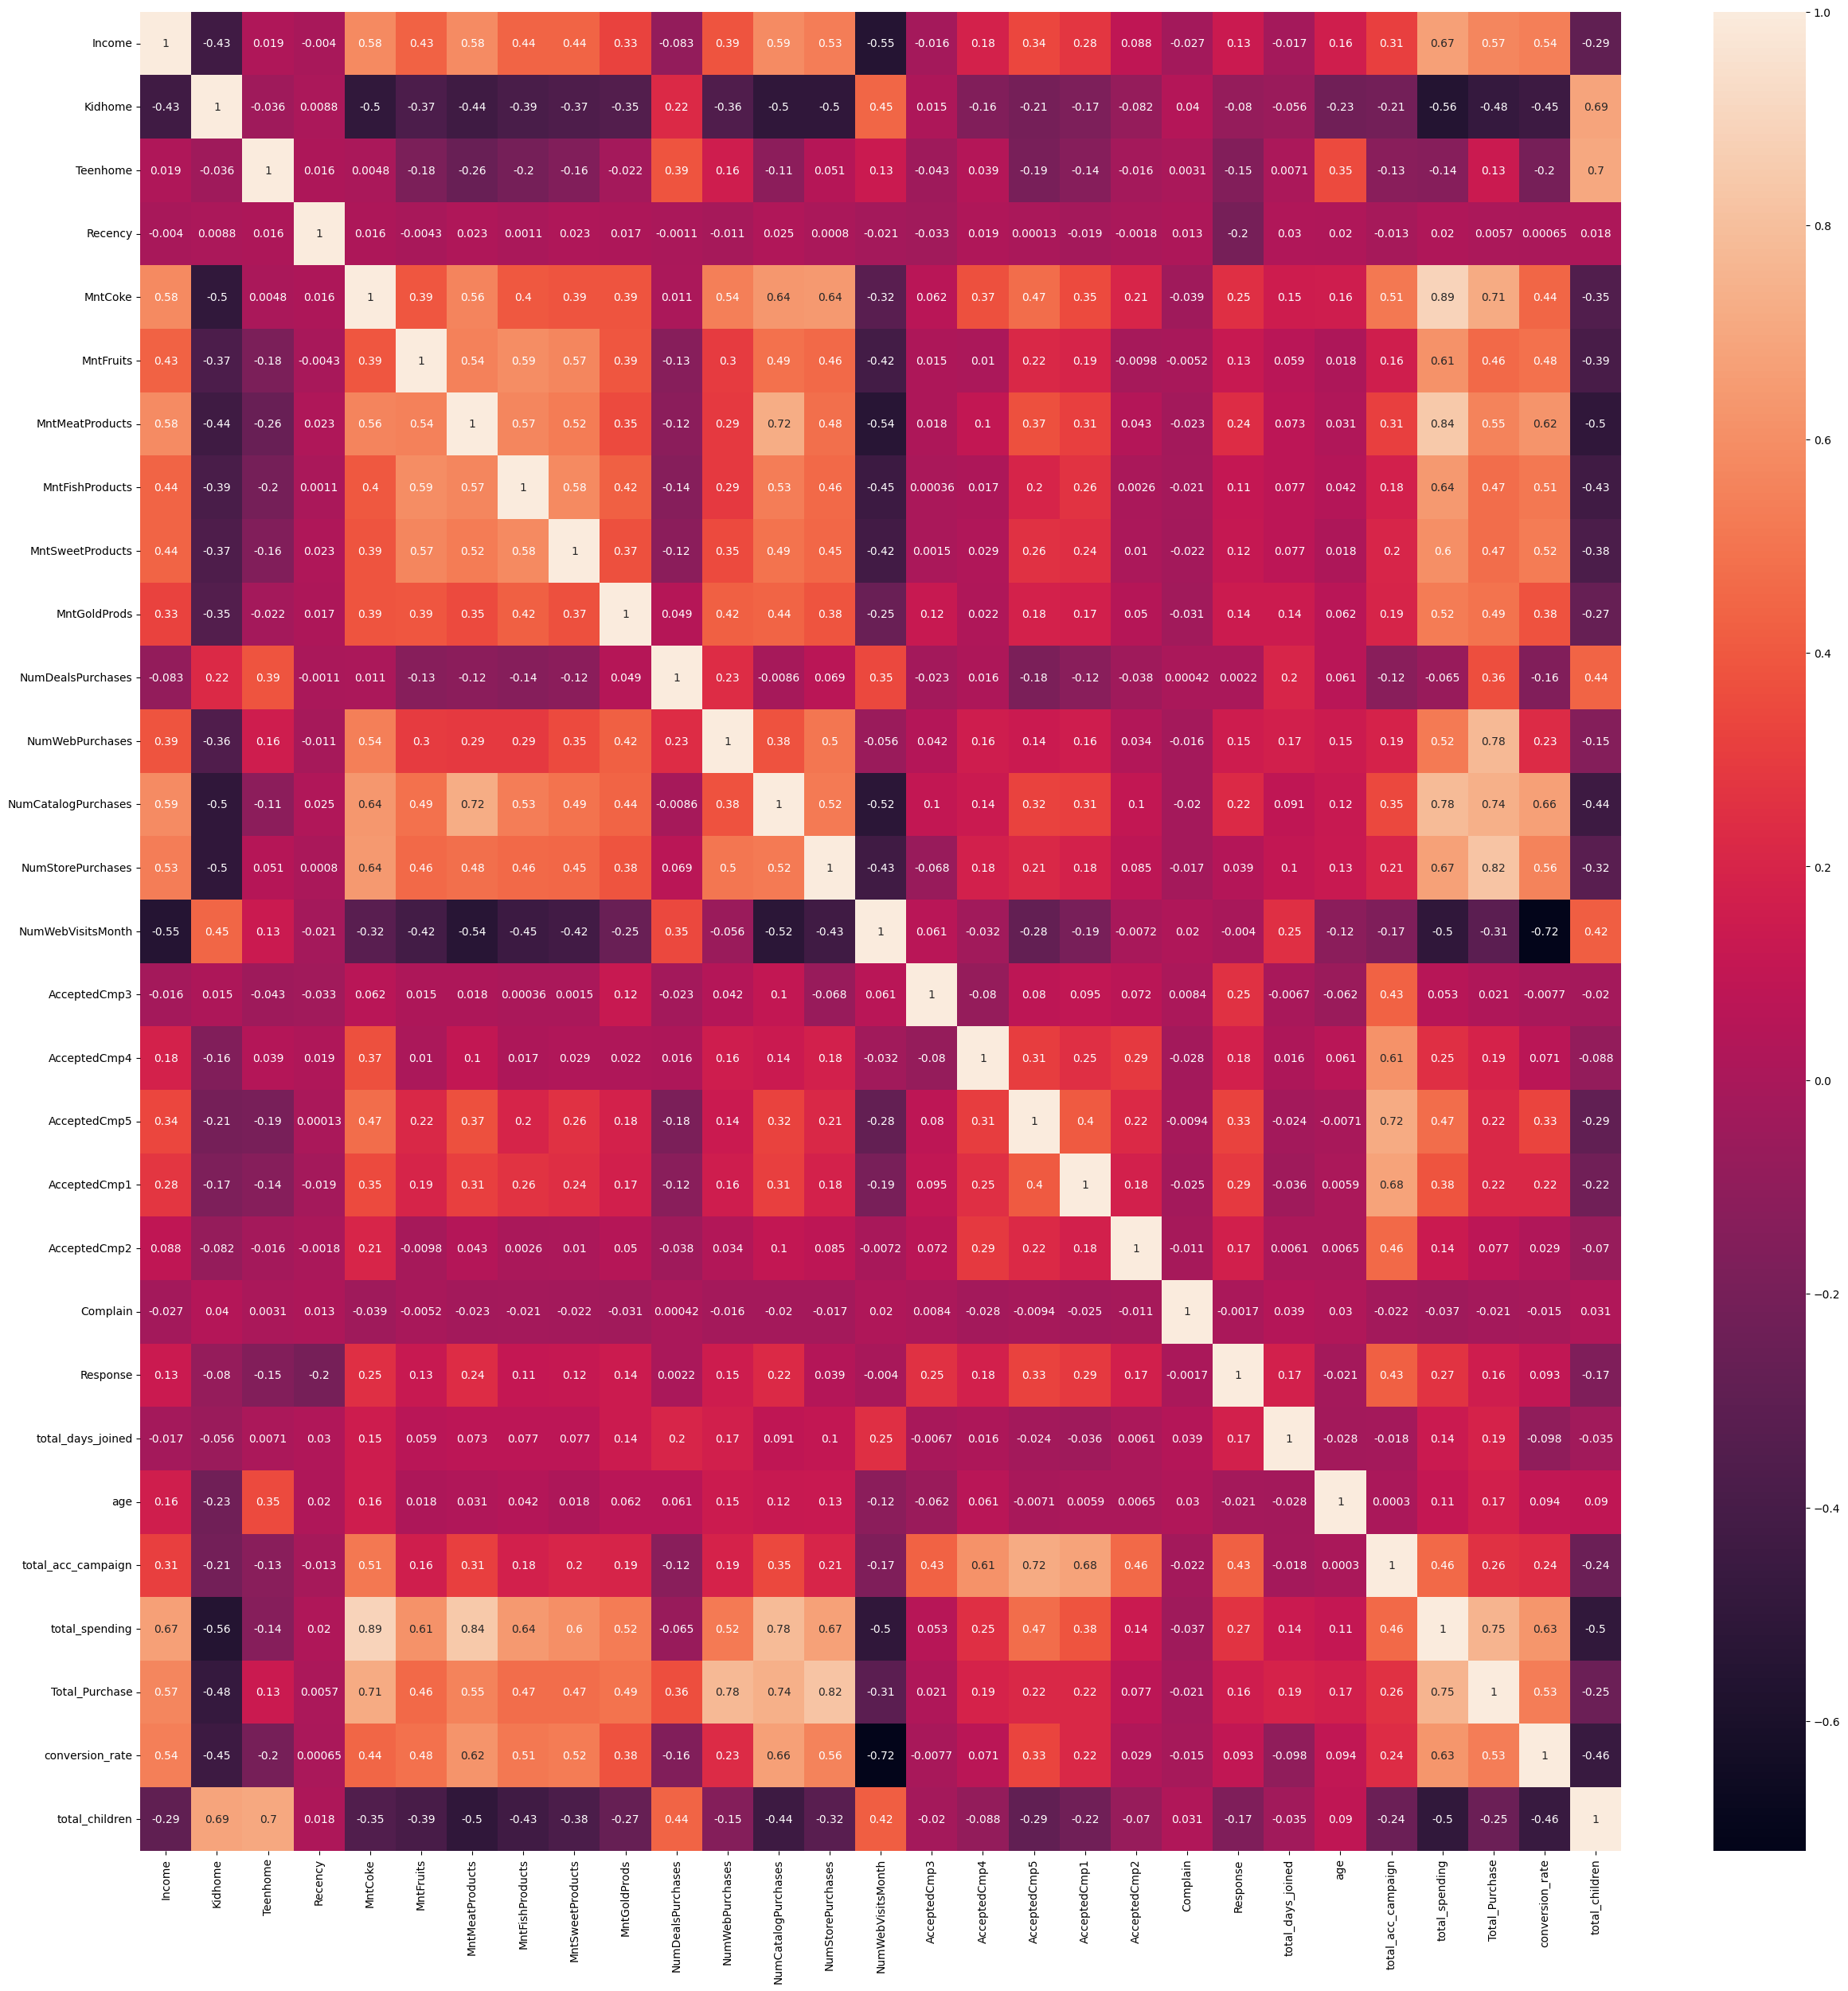

In [26]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot = True)

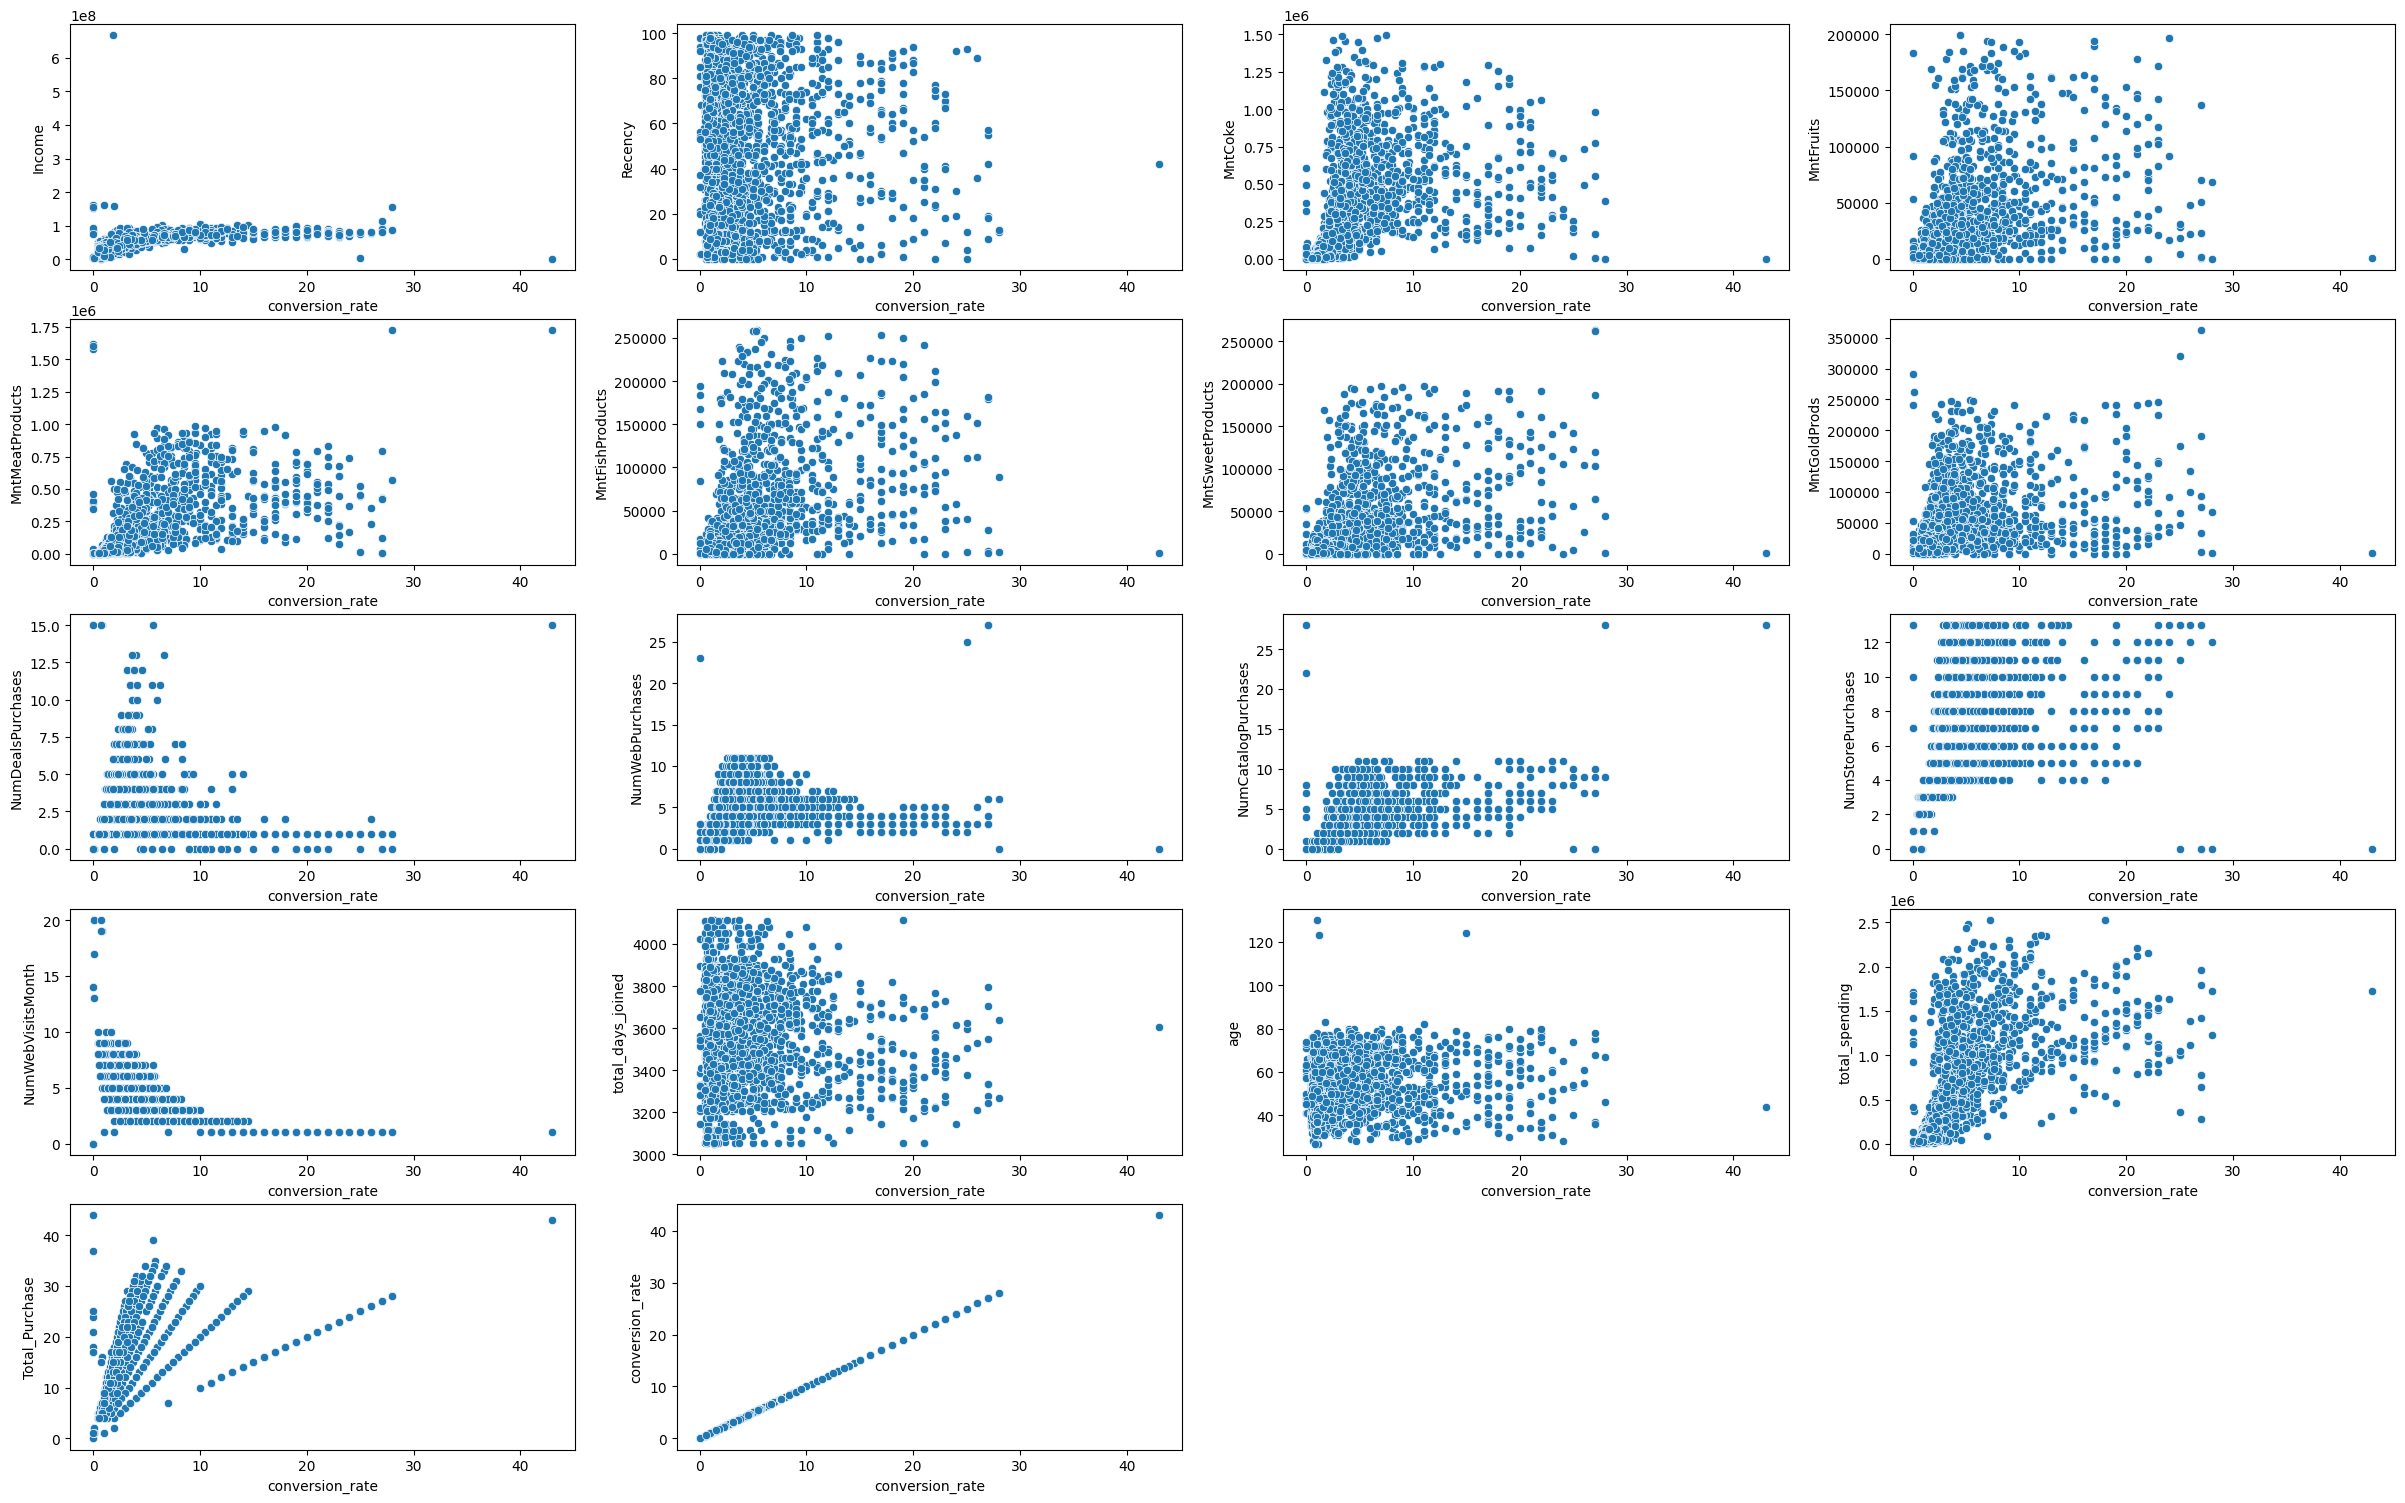

In [27]:
plt.figure(figsize = (30,30))
for i in range(len(numerical)):
  plt.subplot(8, 4, i+1)
  sns.scatterplot(data = df, y = numerical[i], x = 'conversion_rate')

## Correlation Between Conversion Rate and Another Feature

In [28]:
# Create correlation age with conversion_rate
agg_age = df.groupby('age_group').agg({'conversion_rate' : 'sum'}).reset_index()
agg_age['total_conversion_rate'] = df['conversion_rate'].sum()
agg_age['percentage'] = round((agg_age['conversion_rate'] / agg_age['total_conversion_rate'])*100,2)
agg_age

age_group  conversion_rate  total_conversion_rate  percentage
0     26-35       652.912740            9845.297974        6.63
1     36-50      2993.031872            9845.297974       30.40
2     51-75      5733.595029            9845.297974       58.24
3       >75       465.758333            9845.297974        4.73

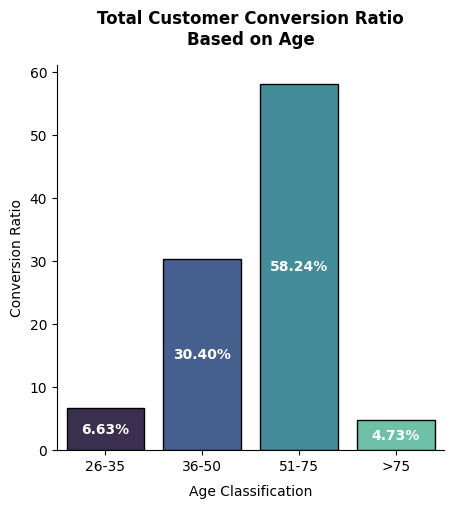

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Total Customer Conversion Ratio\nBased on Age", fontsize=12, color='black', weight='bold', pad = 15)
sns.barplot(data = agg_age, x = 'age_group', y = 'percentage', palette = 'mako', edgecolor = 'black')
plt.xlabel('Age Classification', labelpad = 8)
plt.bar_label(ax.containers[0],['6.63%', '30.40%', '58.24%', '4.73%'], label_type='center', color='white', weight='bold')
plt.ylabel('Conversion Ratio')

sns.despine()

**Feature with high correlation with Conversion_Rate:**
- Income
- Total Spending
- Total children

Text(0.5, 1.0, 'Correlation Between\nIncome and Conversion Rate')

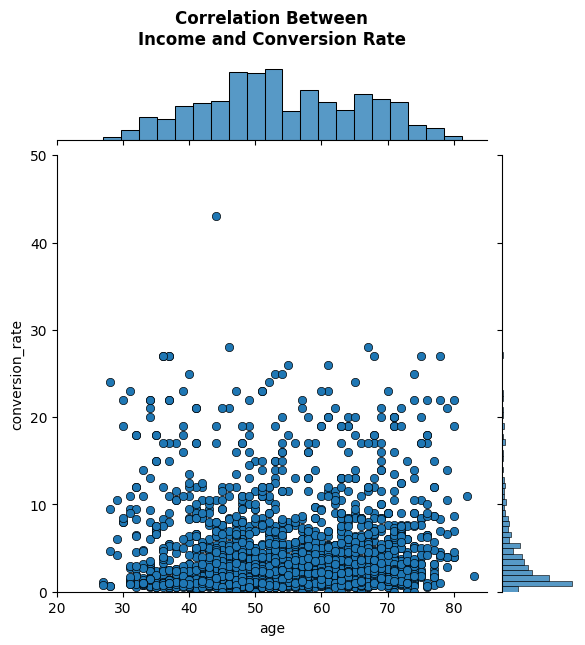

In [30]:
# Correlation with Income
plot = sns.jointplot(data = df, x = 'age', y = 'conversion_rate', edgecolor = 'black')
plot.ax_marg_y.set_ylim(0, 50)
plot.ax_marg_x.set_xlim(20, 85)
plt.title('Correlation Between\nIncome and Conversion Rate', weight = 'bold', pad = 80)

In [31]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Dt_Collected', 'total_days_joined', 'age',
       'total_acc_campaign', 'total_spending', 'Total_Purchase',
       'conversion_rate', 'age_group', 'total_children'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Between\nIncome and Conversion Rate')

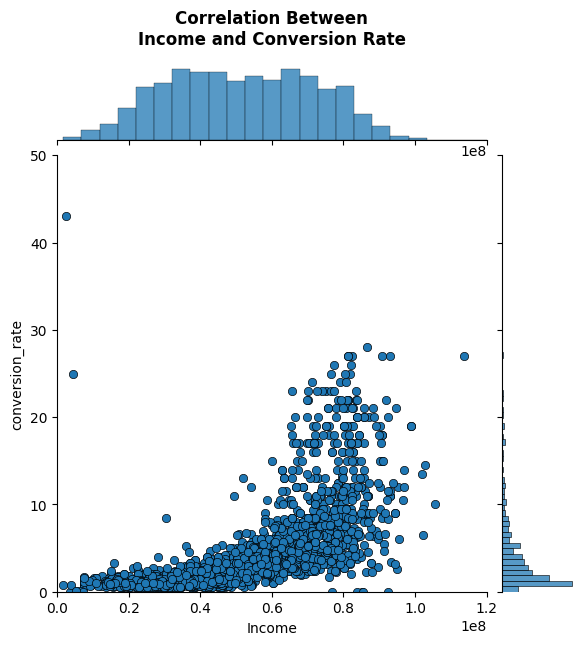

In [32]:
# Correlation with Income
plot = sns.jointplot(data = df, x = 'Income', y = 'conversion_rate', edgecolor = 'black')
plot.ax_marg_y.set_ylim(0, 50)
plot.ax_marg_x.set_xlim(0, 120000000)
plt.title('Correlation Between\nIncome and Conversion Rate', weight = 'bold', pad = 80)

In [33]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Dt_Collected', 'total_days_joined', 'age',
       'total_acc_campaign', 'total_spending', 'Total_Purchase',
       'conversion_rate', 'age_group', 'total_children'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Between\nTotal Spending and Conversion Rate')

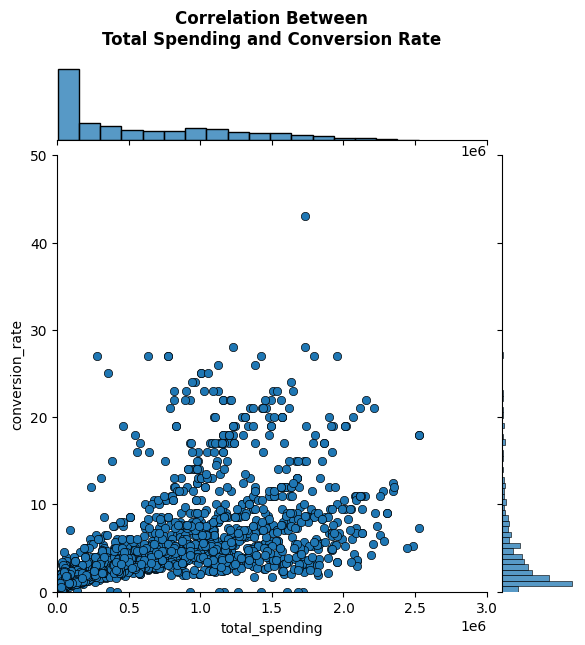

In [34]:
# Correlation with total_spending
plot = sns.jointplot(data = df, x = 'total_spending', y = 'conversion_rate', edgecolor = 'black')
plot.ax_marg_y.set_ylim(0, 50)
plot.ax_marg_x.set_xlim(0, 3000000)
plt.title('Correlation Between\nTotal Spending and Conversion Rate', weight = 'bold', pad = 80)

In [35]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Dt_Collected', 'total_days_joined', 'age',
       'total_acc_campaign', 'total_spending', 'Total_Purchase',
       'conversion_rate', 'age_group', 'total_children'],
      dtype='object')

<Axes: xlabel='total_children', ylabel='conversion_rate'>

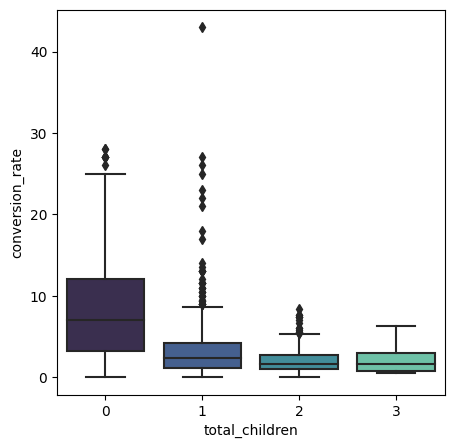

In [36]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df, x = 'total_children', y = 'conversion_rate', palette = 'mako')

In [37]:
# Create correlation total children with conversion_rate
agg_chd = df.groupby('total_children').agg({'conversion_rate' : 'sum'}).reset_index()
agg_chd['total_conversion_rate'] = df['conversion_rate'].sum()
agg_chd['percentage'] = round((agg_chd['conversion_rate'] / agg_chd['total_conversion_rate'])*100,2)
agg_chd

total_children  conversion_rate  total_conversion_rate  percentage
0               0      5379.195863            9845.297974       54.64
1               1      3495.290018            9845.297974       35.50
2               2       870.776775            9845.297974        8.84
3               3       100.035317            9845.297974        1.02

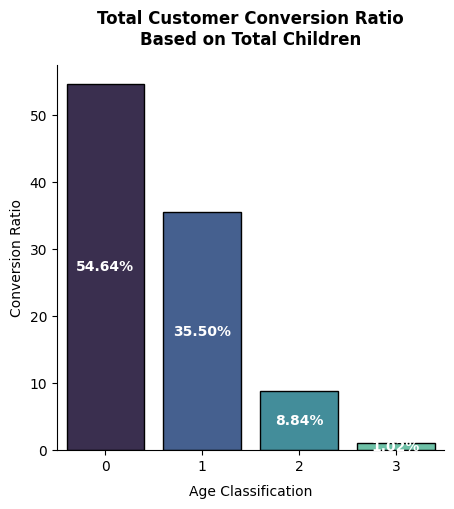

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Total Customer Conversion Ratio\nBased on Total Children", fontsize=12, color='black', weight='bold', pad = 15)
sns.barplot(data = agg_chd, x = 'total_children', y = 'percentage', palette = 'mako', edgecolor = 'black')
plt.xlabel('Age Classification', labelpad = 8)
plt.bar_label(ax.containers[0],['54.64%', '35.50%', '8.84%', '1.02%'], label_type='center', color='white', weight='bold')
plt.ylabel('Conversion Ratio')

sns.despine()

# Data Cleaning and Data Preparation

## Handling Missing Values

In [39]:
df.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Dt_Collected            0
total_days_joined       0
age                     0
total_acc_campaign      0
total_spending          0
Total_Purchase          0
conversion_rate         0
age_group               0
total_children          0
dtype: int64

In [40]:
#fill Income with median
df['Income'] = df['Income'].fillna(df['Income'].median())

## Handling Duplicate Values

In [41]:
df.duplicated().sum()

183

In [42]:
df.shape

(2240, 34)

In [43]:
df.drop_duplicates(inplace = True)

In [44]:
df.shape

(2057, 34)

In [45]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Dt_Collected', 'total_days_joined', 'age',
       'total_acc_campaign', 'total_spending', 'Total_Purchase',
       'conversion_rate', 'age_group', 'total_children'],
      dtype='object')

In [46]:
# Drop unecessary features
df_final = df.drop(columns = ['Kidhome', 'Teenhome',
       'Dt_Customer', 'MntCoke', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'])

<Axes: >

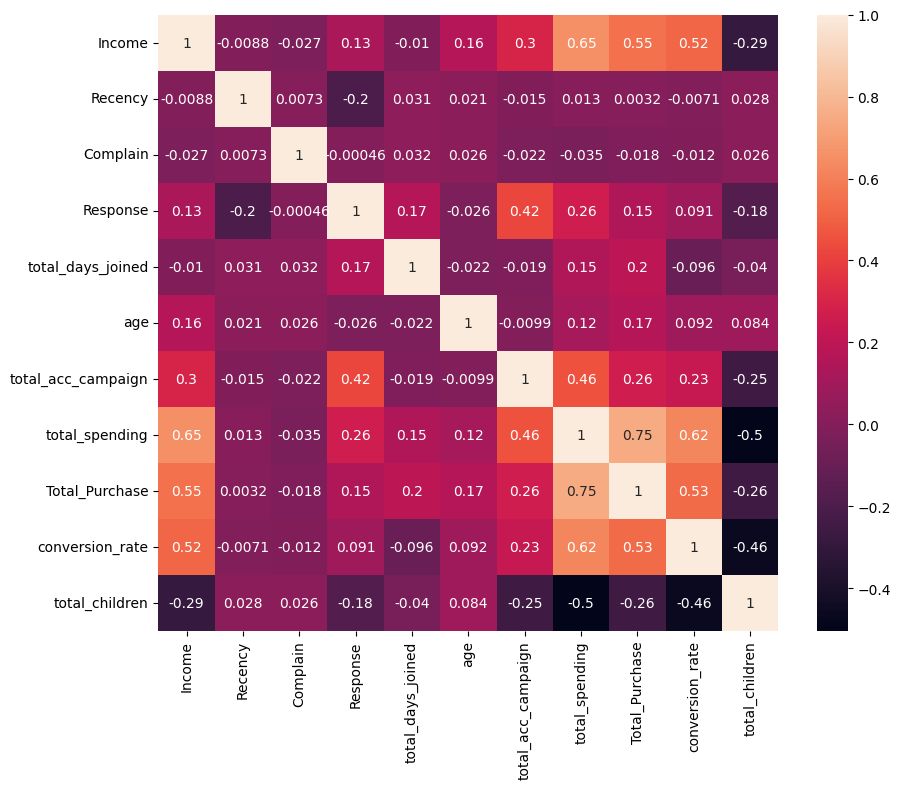

In [47]:
plt.figure(figsize = (10,8))
sns.heatmap(df_final.corr(), annot = True)

## Features Selection

The features chosen with LFRMC by Tao (2020). It is a developed RFM Analysis for customer segmentation.<br>
F: The frequency of customer's purchase during observation time (**conversion_rate**)<br>
R: The number of days since the last purhase (**Recency**) <br>
M: The number of money the customer spending (**total_spending**) <br>


In [48]:
df_selection = df[['conversion_rate', 'Recency', 'total_spending']]

## Handling Outliers

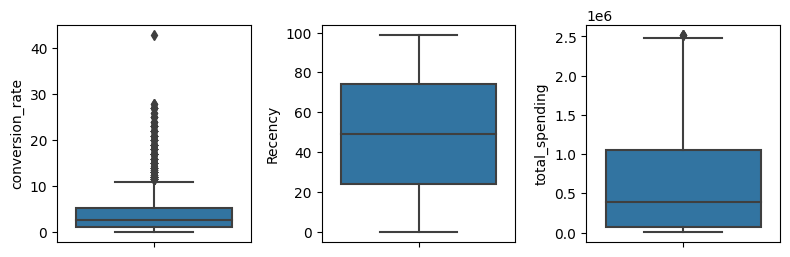

In [49]:
plt.figure(figsize = (8,5))
for i in range(len(df_selection.columns)):
  plt.subplot(2, 3, i+1)
  sns.boxplot(data = df_selection, y = df_selection.columns[i])
  plt.tight_layout()

Untuk sementara outlier tidak dihapus atau ditangani karena:
- Outlier yang tidak terlalu jauh (kecuali feature total campaign)
- Untuk total campaign terdapat pola

## Feature Trasformation

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

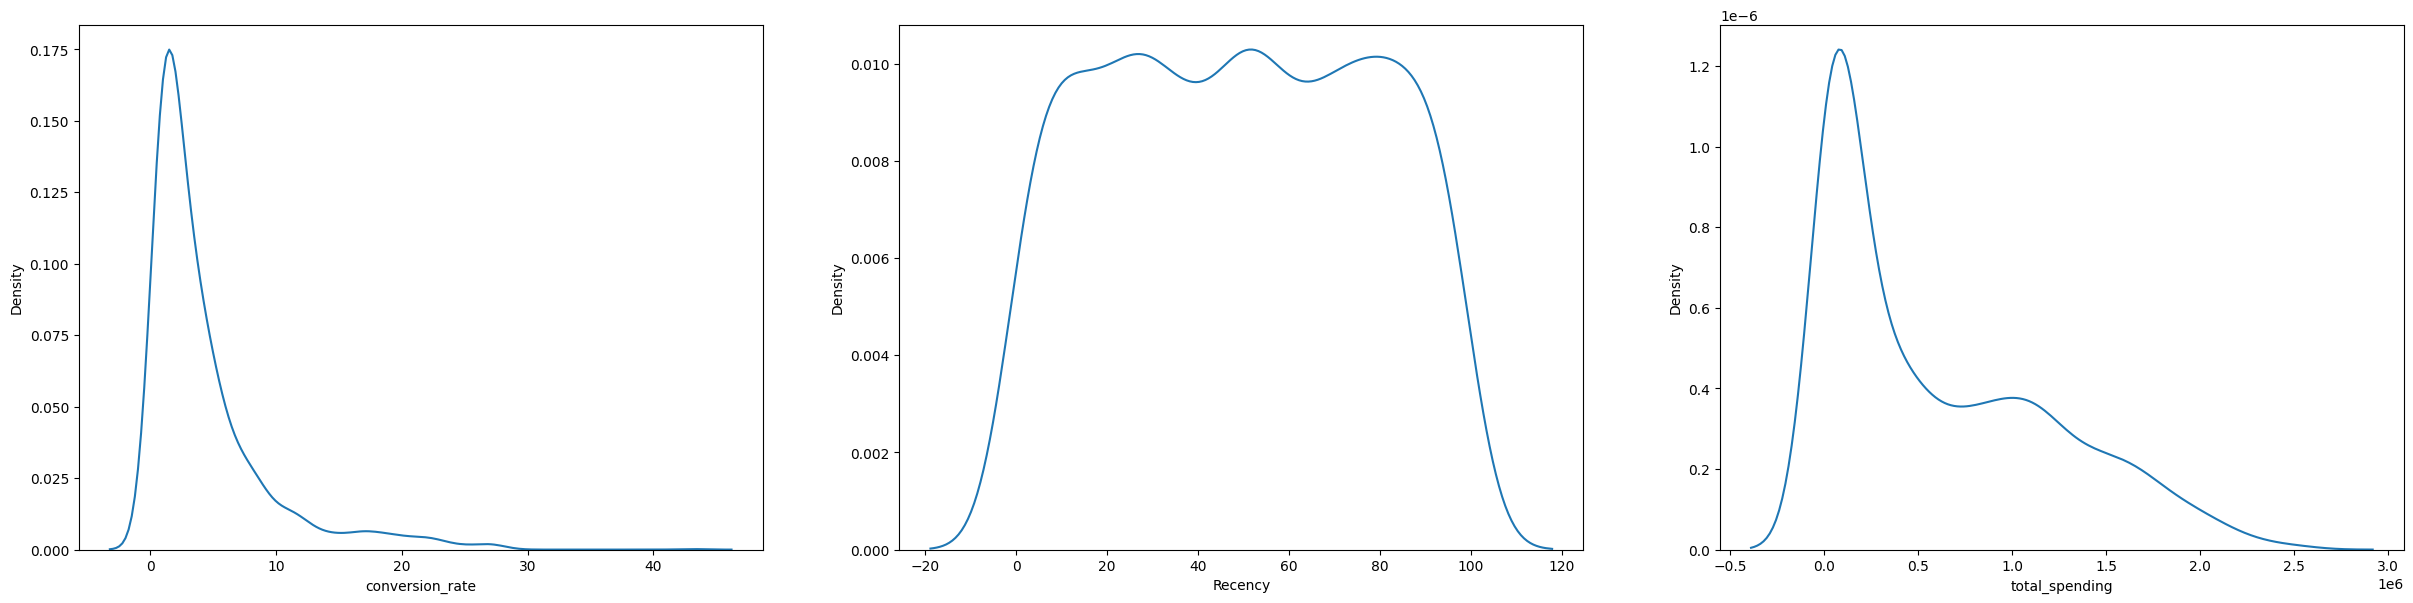

In [51]:
col = df_selection.columns
plt.figure(figsize = (30,15))
for i in range(len(col)):
  plt.subplot(2, 3, i+1)
  sns.kdeplot(data = df_selection, x = col[i])

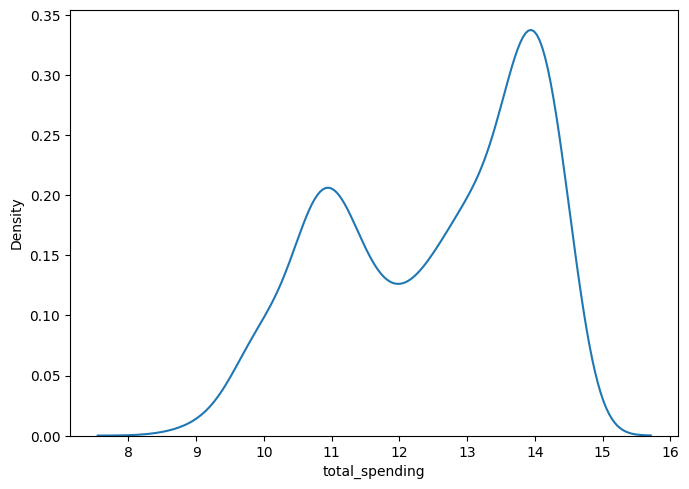

In [52]:
#log tranformation on column `M`

df_transform = df_selection.copy()
df_transform['total_spending'] = np.log(df_selection['total_spending'])

plt.figure(figsize= (7, 5))
sns.kdeplot(x = df_transform['total_spending'])
plt.tight_layout()

In [53]:
norm = MinMaxScaler()
df_norm = norm.fit_transform(df_transform)
df_norm = pd.DataFrame(df_norm, columns=col)
df_norm.sample(10)

conversion_rate   Recency  total_spending
1730         0.096346  0.131313        0.783465
1381         0.038760  0.494949        0.439287
464          0.019934  0.919192        0.349382
1297         0.220930  0.858586        0.955827
1030         0.011628  0.919192        0.205787
930          0.093023  0.696970        0.763128
1037         0.290698  0.272727        0.893098
348          0.139535  0.383838        0.855788
131          0.110465  0.101010        0.799532
1148         0.038760  0.505051        0.534180

In [54]:
df_norm.describe()

conversion_rate      Recency  total_spending
count      2057.000000  2057.000000     2057.000000
mean          0.101877     0.494689        0.642670
std           0.114175     0.292813        0.238933
min           0.000000     0.000000        0.000000
25%           0.029070     0.242424        0.421663
50%           0.061047     0.494949        0.702375
75%           0.124031     0.747475        0.858574
max           1.000000     1.000000        1.000000

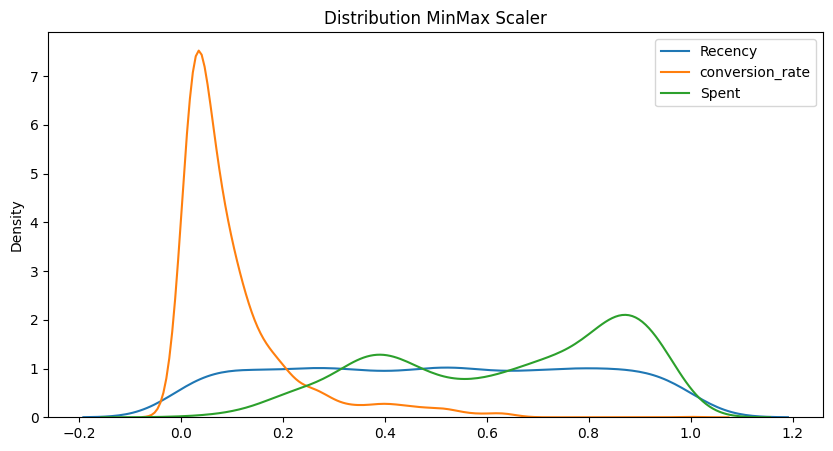

In [55]:
plt.figure(figsize=(10, 5))
plt.title('Distribution MinMax Scaler')
sns.kdeplot(df_norm['Recency'], label = 'Recency')
sns.kdeplot(df_norm['conversion_rate'], label = 'conversion_rate')
sns.kdeplot(df_norm['total_spending'], label = 'Spent')
plt.xlabel(None)
plt.legend()
plt.show()

# Modelling

## Elbow Method

<Axes: title={'center': 'Elbow Method'}, xlabel='n_cluster'>

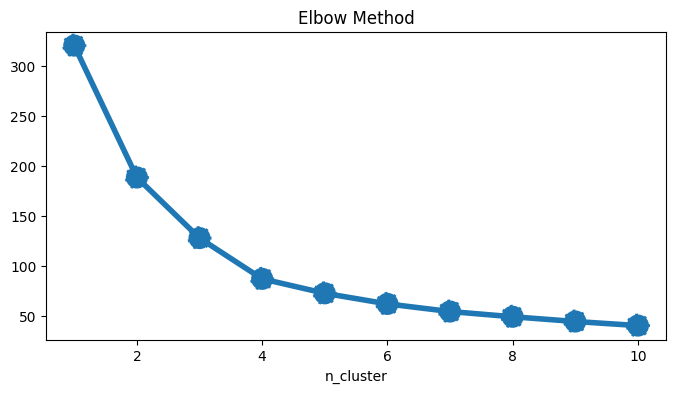

In [56]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_norm)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.title('Elbow Method')
plt.xlabel('n_cluster')
sns.lineplot(x=range(1, 11), y=inertia, linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300,  linestyle='--')

## Silhoutte Score

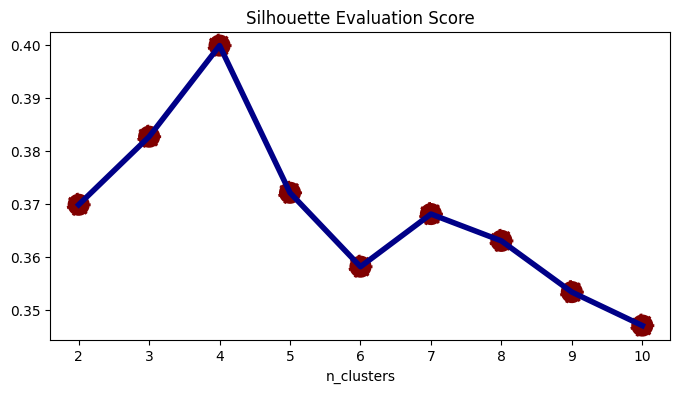

In [57]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_norm)
    preds = kmeans.predict(df_norm)
    score_euclidean = silhouette_score(df_norm, preds, metric='euclidean')
    silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(8, 4))
plt.title('Silhouette Evaluation Score')
sns.lineplot(x=range(2,11), y=silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.xlabel('n_clusters')
plt.show()

## Clustering

In [58]:
df_cluster = df_norm.copy()

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_cluster)
df_cluster['km_labels'] = kmeans.labels_

## PCA

In [59]:
df_norm

conversion_rate   Recency  total_spending
0            0.083056  0.585859        0.928402
1            0.027907  0.383838        0.270927
2            0.122093  0.262626        0.810453
3            0.031008  0.262626        0.379281
4            0.088372  0.949495        0.712591
...               ...       ...             ...
2052         0.042636  0.232323        0.404478
2053         0.083721  0.464646        0.898334
2054         0.073643  0.919192        0.885884
2055         0.178295  0.080808        0.823758
2056         0.036545  0.404040        0.568403

[2057 rows x 3 columns]

In [60]:
from sklearn.decomposition import PCA 

col = df_norm.columns
X = df_cluster[col]
y = df_cluster['km_labels']

pca = PCA(n_components=2).fit_transform(X)

df_pca = pd.DataFrame(data = pca, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = y
df_pca.sample(10)

PC 1      PC 2  clusters
443  -0.244243 -0.203544         1
526  -0.501053  0.162514         2
898   0.053532 -0.343245         0
1927 -0.342678  0.241422         2
1837 -0.118819 -0.049888         1
1172 -0.198908  0.192753         2
63   -0.408801 -0.132742         1
1014  0.346747 -0.325633         0
1231  0.336758 -0.065117         0
223  -0.032614  0.076052         2

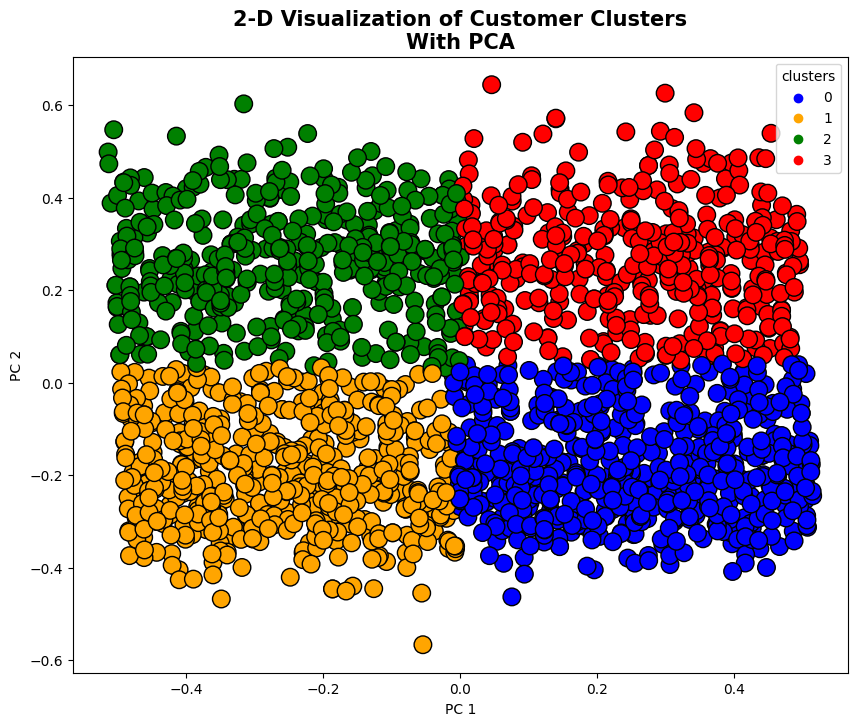

In [61]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("2-D Visualization of Customer Clusters\nWith PCA", fontsize=15, weight='bold')
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    #linestyle='--',
    data=df_pca,
    palette=['blue','orange','green','red'],
    s=160,
    ax=ax
);

In [62]:
df_norm_2 = df_norm.copy()
df_norm_2['km_labels'] = y

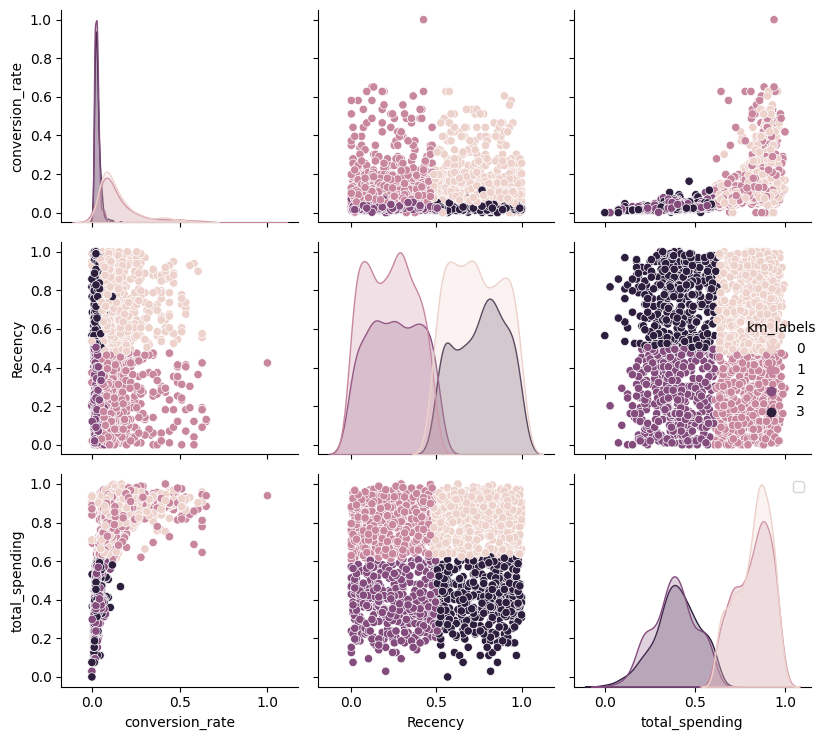

In [63]:
sns.pairplot(data=df_norm_2, hue='km_labels', diag_kind='kde')
plt.legend()
plt.tight_layout()

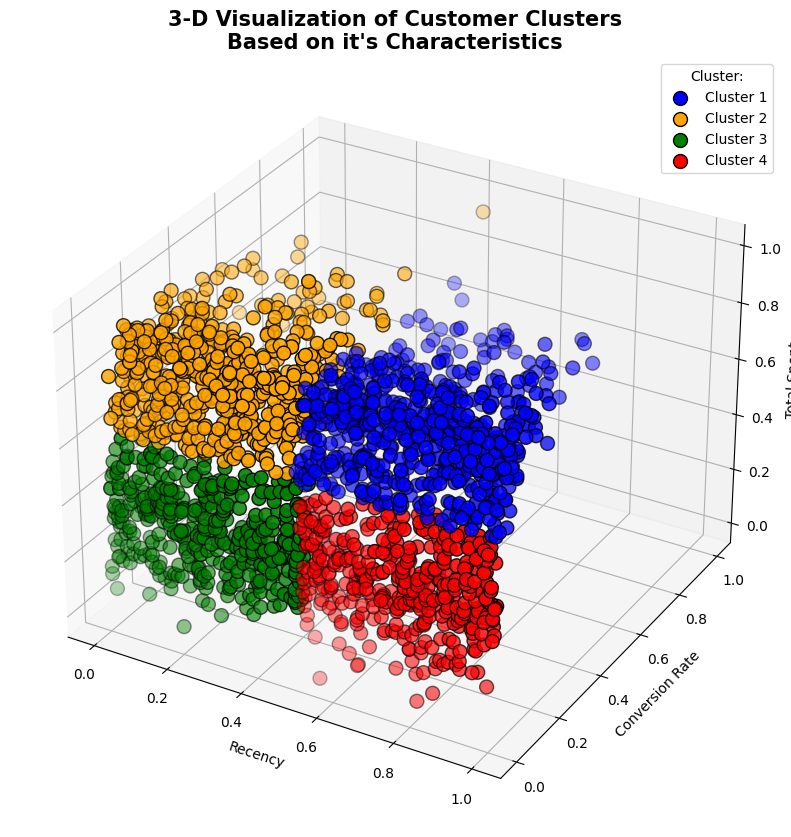

In [64]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on it's Characteristics", fontsize=15, weight='bold')
ax.scatter(df_norm_2['Recency'][df_norm_2.km_labels == 0], df_norm_2['conversion_rate'][df_norm_2.km_labels == 0], df_norm_2['total_spending'][df_norm_2.km_labels == 0], c='blue', s=100, edgecolor='black', label='Cluster 1')
ax.scatter(df_norm_2['Recency'][df_norm_2.km_labels == 1], df_norm_2['conversion_rate'][df_norm_2.km_labels == 1], df_norm_2['total_spending'][df_norm_2.km_labels == 1], c='orange', s=100, edgecolor='black', label='Cluster 2')
ax.scatter(df_norm_2['Recency'][df_norm_2.km_labels == 2], df_norm_2['conversion_rate'][df_norm_2.km_labels == 2], df_norm_2['total_spending'][df_norm_2.km_labels == 2], c='green', s=100, edgecolor='black', label='Cluster 3')
ax.scatter(df_norm_2['Recency'][df_norm_2.km_labels == 3], df_norm_2['conversion_rate'][df_norm_2.km_labels == 3], df_norm_2['total_spending'][df_norm_2.km_labels == 3], c='red', s=100, edgecolor='black', label='Cluster 4')
plt.xlabel('Recency')
plt.ylabel('Conversion Rate')
ax.set_zlabel('Total Spent')
plt.legend(title='Cluster:')
plt.show()

In [65]:
df_selection

conversion_rate  Recency  total_spending
0            3.571429       58         1617000
1            1.200000       38           27000
2            5.250000       26          776000
3            1.333333       26           53000
4            3.800000       94          422000
...               ...      ...             ...
2233         1.833333       23           62000
2235         3.600000       46         1341000
2237         3.166667       91         1241000
2238         7.666667        8          843000
2239         1.571429       40          172000

[2057 rows x 3 columns]

In [66]:
df_vil = df_selection.copy().reset_index(drop = True)
df_vil['cluster'] = y

In [67]:
df_vil

conversion_rate  Recency  total_spending  cluster
0            3.571429       58         1617000        0
1            1.200000       38           27000        2
2            5.250000       26          776000        1
3            1.333333       26           53000        2
4            3.800000       94          422000        0
...               ...      ...             ...      ...
2052         1.833333       23           62000        2
2053         3.600000       46         1341000        1
2054         3.166667       91         1241000        0
2055         7.666667        8          843000        1
2056         1.571429       40          172000        2

[2057 rows x 4 columns]

In [68]:
a = df_vil.groupby('cluster').agg({'total_spending' : 'count'}).reset_index()
a['Total']= a['total_spending'].sum()
a['pctg'] = round((a['total_spending']/a['Total'])*100,2)
a['cluster'] = a['cluster'].replace({0: 'Cluster 1',
                      1: 'Cluster 2',
                      2: 'Cluster 3',
                      3: 'Cluster 4'})
a

cluster  total_spending  Total   pctg
0  Cluster 1             623   2057  30.29
1  Cluster 2             576   2057  28.00
2  Cluster 3             440   2057  21.39
3  Cluster 4             418   2057  20.32

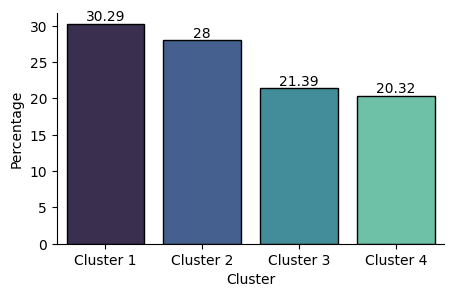

In [69]:
plt.figure(figsize = (5,3))
ax = sns.barplot(x = 'cluster', y = 'pctg',data = a, palette = 'mako', edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('Percentage')
plt.xlabel('Cluster')
sns.despine()

In [70]:



group_df = df_norm_2.groupby('km_labels').agg(['mean'])
group_df

conversion_rate   Recency total_spending
                     mean      mean           mean
km_labels                                         
0                0.152174  0.735817       0.825211
1                0.156025  0.225940       0.820800
2                0.027936  0.254982       0.382517
3                0.030128  0.757962       0.398990

In [71]:
group_vi = df_vil.groupby('cluster').agg(['mean'])
group_vi

conversion_rate    Recency total_spending
                   mean       mean           mean
cluster                                          
0              6.543487  72.845907  993528.089888
1              6.709064  22.368056  980342.013889
2              1.201269  25.243182   70234.090909
3              1.295506  75.038278   78160.287081

In [72]:
a = group_df.iloc[0,:].reset_index()
cl0 = a[0].to_list()
cl0.append(a[0][0])

In [73]:
cl0

[0.15217411849331666,
 0.735817241435219,
 0.8252105219802998,
 0.15217411849331666]

In [74]:
a[0]

0    0.152174
1    0.735817
2    0.825211
Name: 0, dtype: float64

In [75]:
# Cluster 0
a = group_df.iloc[0,:].reset_index()
cl0 = a[0].to_list()
cl0.append(a[0][0])
# Cluster 1
a = group_df.iloc[1,:].reset_index()
cl1 = a[1].to_list()
cl1.append(a[1][0])
# Cluster 2
a = group_df.iloc[2,:].reset_index()
cl2 = a[2].to_list()
cl2.append(a[2][0])
# Cluster 3
a = group_df.iloc[3,:].reset_index()
cl3 = a[3].to_list()
cl3.append(a[3][0])

In [76]:
a['level_0']

0    conversion_rate
1            Recency
2     total_spending
Name: level_0, dtype: object

In [90]:
list_col = a['level_0'].to_list()
list_col.append('conversion_rate')

In [91]:
import plotly.graph_objs as go

# create the data for the radar chart
data = [
    go.Scatterpolar(
        r=cl0, # values for series 1
        theta=list_col, # variable names for series 1
        fill='none',
        name='Cluster 1'
    ),
    go.Scatterpolar(
        r=cl1, # values for series 2
        theta=list_col, # variable names for series 2
        fill='none',
        name='Cluster 2'
    ),
    go.Scatterpolar(
        r=cl2, # values for series 3
        theta=list_col, # variable names for series 3
        fill='none',
        name='Cluster 3'
    ),
     go.Scatterpolar(
        r=cl3, # values for series 3
        theta=list_col, # variable names for series 3
        fill='none',
        name='Cluster 4'
     )
     ]

# create the layout for the radar chart
layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True
)

# create the figure with the data and layout
fig = go.Figure(data=data, layout=layout)

# show the figure
fig.show()


Cluster 1: Loyal Customer - Customer with high spending and high frequent but for some point haven't bought from the platform for a while <br>
Cluster 2: Core Customer - Customer with high spending, high frequent, also recent customer <br>
Cluster 3: New Customer - recent new customer <br>
Cluster 4: Inactive Customer -customer with low spending and not frequent customer but some point haven't bought again

In [147]:
df_vil['customer_type'] = np.where(df_vil['cluster'] == 0, 'Loyal Customers', 
                                   np.where(df_vil['cluster'] == 1, 'Core Customer',
                                            np.where(df_vil['cluster'] == 2, 'New Customer', 'Inactive Customer')))

In [148]:
df_vil

conversion_rate  Recency  total_spending  cluster    customer_type
0            3.571429       58         1617000        0  Loyal Customers
1            1.200000       38           27000        2     New Customer
2            5.250000       26          776000        1    Core Customer
3            1.333333       26           53000        2     New Customer
4            3.800000       94          422000        0  Loyal Customers
...               ...      ...             ...      ...              ...
2052         1.833333       23           62000        2     New Customer
2053         3.600000       46         1341000        1    Core Customer
2054         3.166667       91         1241000        0  Loyal Customers
2055         7.666667        8          843000        1    Core Customer
2056         1.571429       40          172000        2     New Customer

[2057 rows x 5 columns]

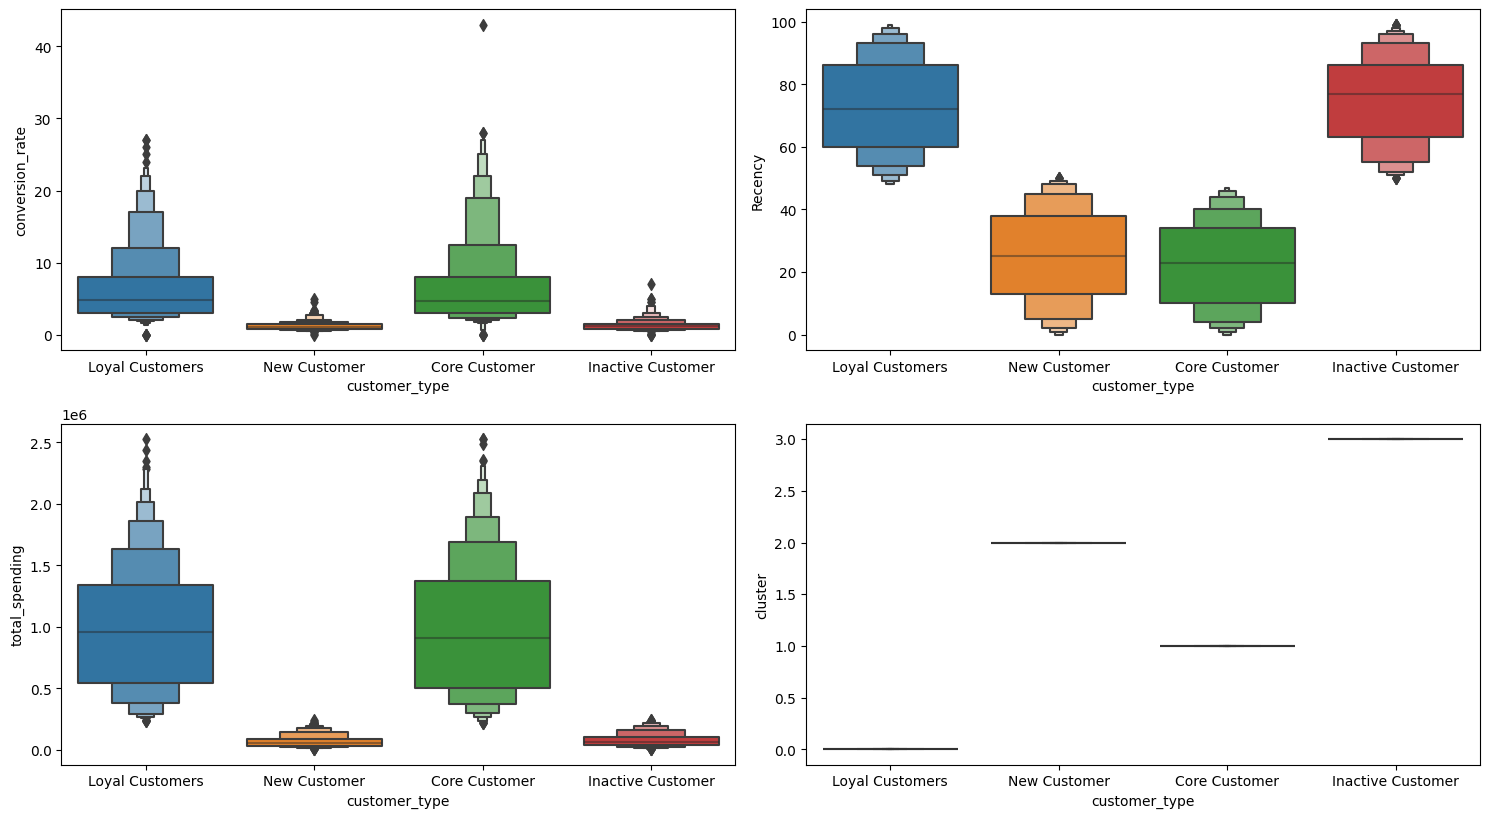

In [165]:
col = df_vil.columns.drop('customer_type')
plt.figure(figsize= (15, 12))
for i in range(len(col)):
    plt.subplot(3, 2, i+1)
    sns.boxenplot(x=df_vil['customer_type'], y=df_vil[col[i]])
    plt.tight_layout()

In [150]:
spent_data = df_vil.groupby('customer_type').agg({'total_spending' : 'sum'})
spent_data['Total'] = spent_data['total_spending'].sum()
spent_data['pctg'] = round((spent_data['total_spending']/spent_data['Total'])*100,2)
spent_data.reset_index(inplace = True)

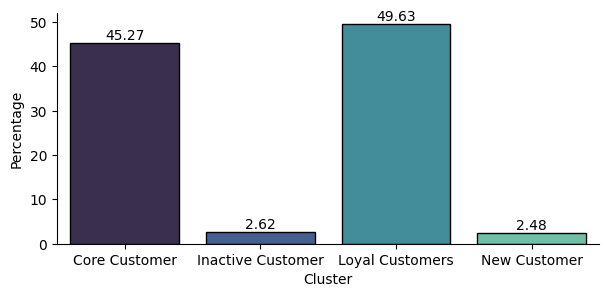

In [171]:
plt.figure(figsize = (7,3))
ax = sns.barplot(x = 'customer_type', y = 'pctg',data = spent_data, palette = 'mako', edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('Percentage')
plt.xlabel('Cluster')
sns.despine()

In [152]:
df_vil[df_vil['customer_type'] == 'Inactive Customer'].mean()

conversion_rate        1.295506
Recency               75.038278
total_spending     78160.287081
cluster                3.000000
dtype: float64

# Insights

Based on Clustering, insights that we could get: <br>

---
Core Customers

- There are 28% of total customers from this group
- This customers have a high average spending in our platform (~ 1M/year). They contribute 45.27% income value to our platform. This customers also a frequent customers. Their conversion rate average pretty high (~ 8%) They are also a recent customers, which means they bought a product not too long ago (~ 22 days ago).
- Overall, this type customers giving high value and also a very loyal customers ~ 75 days ago in average. That means, they once a loyal and high value customers, but at some point they stopped to buy

---
Loyal Customers

- There are 30,3% of total customers from this group
- This customers have a high average spending on our platform (~ 1M/year). They contributed for 49.63% income value to our platform. They also identified as a frequent customers (~ 8% conversion rate). But, they are not a recent customers. They last bought was in ~ 75 days ago in average.
- Overall, this customers once a high value and frequent customers, but at some point they stopped to buy in our platform

---
New Customers
- There are 21.4% of total customers from this group
- This type customers are new customers. That means they didn't spent much in our platform yet (~70k/year in average). They also not frequent since they're still a new customers. They conversion rate only 1% but they are a recent new customers. That means they bought a product not long ago (25 days ago in average)
- Overall this customers are a new customers. They still spending not a lot but they can be a potential customers to be a core customers

---
Inactive Customer
- There are 20.32% of total customers from this group
- This type customers doesn't spent a lot in our website (~ 78k/year in average). They also not a frequent customers, they conversion rates only 1.3%. Last time they bought a product are 75 days ago in average. 
- Overall, for some point this customers like inactive customer, they don't spent a lot also not a frequent customers

---

# Business Recommendation


---
Core Customers <br>
- This customer is loyal and not hesitant to spend money / buy products at a high price. Therefore, for this customer, **discounts should be put aside** and the **focus should be on customer service**, as well as on adding value through offers based on **product recommendations that are based on previous purchases.** <br>
- **Identify and engage with these customers** early on in their relationship with the platform to maintain their loyalty and increase their lifetime value. **Provide them with special offers or personalized attention and ensure that they have a seamless experience with the platform**

---

Loyal Customers <br>
- Maintain a strong relationship with these customers and continue to provide them with a high level of service and personalized attention. This might include loyalty programs, special discounts or offers, or exclusive access to new products or features.

---
New Customer <br>
- Engage with these customers early on in their relationship with the platform and **encourage them to continue engaging. Provide targeted offers or incentives to encourage repeat purchases or usage**

---
Inactive Customer <br>
- **Identify why these customers are not engaging with the platform and develop targeted strategies to re-engage them.** This might include personalized offers, improving the user experience, or providing better customer service.
---

By giving them the needed treatment, we can prevent their likely to churn and stay on our platform

# Impact

In [153]:
print("Total Spending Diamond Customers: " + str(df_vil[df_vil['cluster'] == 1]['total_spending'].sum()))
print("Total Spending Gold Customers: " + str(df_vil[df_vil['cluster'] == 2]['total_spending'].sum()))
print("Total: " + str(575786000+602886000))

Total Spending Diamond Customers: 564677000
Total Spending Gold Customers: 30903000
Total: 1178672000


In [154]:
print("Total Revenue: " + str(df_vil['total_spending'].sum()))

Total Revenue: 1247219000


In [155]:
1178672000/1247219000

0.9450401252707022

By applying the business recommendation to give a suitable treatment for particular customers, we could get 1.2B/year for approximation. And, if we prioritize the loyal customers and core customers, we could still get 94.5% from all the total revenue